# Data Preprocessing

In [1]:
# importing necessory libraries
# if sklearn doesnot work run this line -> "!pip install sklearn"
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

pd.set_option('display.max_columns',None) # it will display all the columns of dataframe

In [2]:
df = pd.read_csv('006_co2.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.head()   # display head of the data set , by default display 5 rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()      # display the information of the data set!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape   # tells us about the shape of the data set (rows , columns)

(7385, 12)

In [6]:
len(df)  # how many samples/rows in the data set!

7385

In [7]:
df.isna().sum()     # tells about the null values in the data set

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.isna().sum().sum()     # tells about the total null values of the data set!

0

In [9]:
# it will give you the frequency in each column
for column in  list(df.columns):
    print(df[column].value_counts())
    print()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

Model
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27

In [10]:
# using Label encoding
from sklearn.preprocessing import LabelEncoder
# encoding Make column
le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

In [11]:
# encoding Fuel Type column
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

In [12]:
# encoding Transmission column
df['Transmission'] = le.fit_transform(df['Transmission'])

In [13]:
# encoding Vehicle Class column
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   int32  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int32  
 6   Fuel Type                         7385 non-null   int32  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [15]:
# droping columns
df.drop('Model',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Vehicle Class                     7385 non-null   int32  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int32  
 5   Fuel Type                         7385 non-null   int32  
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int32(4), int64(3)
memory usage: 519.4 KB


# Correlation

In [16]:
correlation = df.corr()
correlation

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Vehicle Class,-0.029558,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),0.182649,-0.277606,-0.757854,-0.719321,0.331213,-0.016880,-0.927059,-0.890638,-0.925576,1.000000,-0.907426


<Axes: >

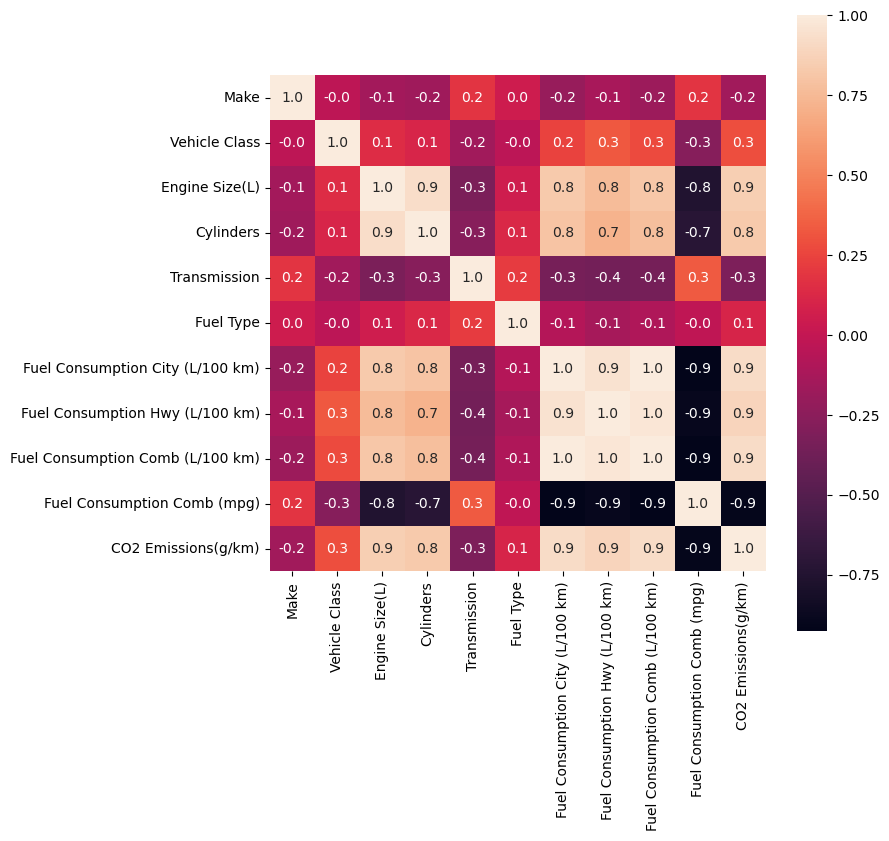

In [17]:
# constructing the correlation heat map 
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True, fmt='.1f',annot=True)

In [18]:
# drop the columns on bases of correlation heat map
# if the more then 50% of columns are negitive corelated we will drop them 

# Data Spliting 

In [19]:
X = df.drop('CO2 Emissions(g/km)',axis=1)
Y = df['CO2 Emissions(g/km)']

In [20]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Vehicle Class                     7385 non-null   int32  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int32  
 5   Fuel Type                         7385 non-null   int32  
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
dtypes: float64(4), int32(4), int64(2)
memory usage: 461.7 KB
None


In [21]:
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7385 entries, 0 to 7384
Series name: CO2 Emissions(g/km)
Non-Null Count  Dtype
--------------  -----
7385 non-null   int64
dtypes: int64(1)
memory usage: 57.8 KB
None


In [22]:
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,test_size=0.25,random_state=25)
print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   5538
Size of Train Y =   5538
Size of Test X =   1847
Size of Test Y =   1847


# <u>Linear Regression</u>

In [23]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

## Predicting on Train Data

In [24]:
# accuracy for prediction on training data 
train_data_prediction = model.predict(X_TRAIN)
print(train_data_prediction)

[280.013408   315.84268011 144.72620894 ... 294.17432435 236.5539138
 198.74325804]


In [25]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,train_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,train_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9153849568066784
Mean Absolute Error =  11.17147303195528


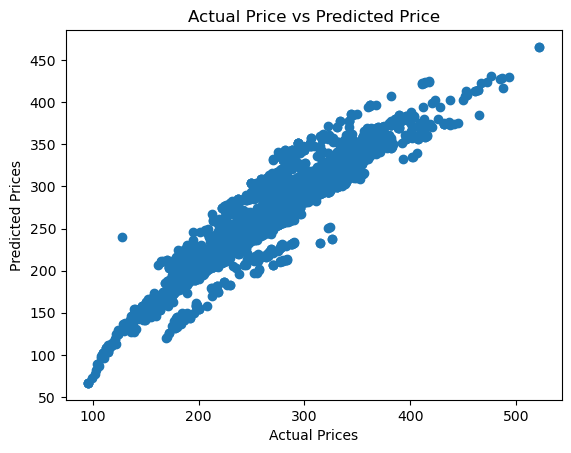

In [26]:
plt.scatter(Y_TRAIN,train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Prediction on Test Data

In [27]:
y_pred = model.predict(X_TEST)
y_pred

array([233.2941932 , 283.77211363, 242.956709  , ..., 237.3456667 ,
       191.57369611, 174.13609452])

In [28]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9173989134759174
Mean Absolute Error =  11.044093610214464


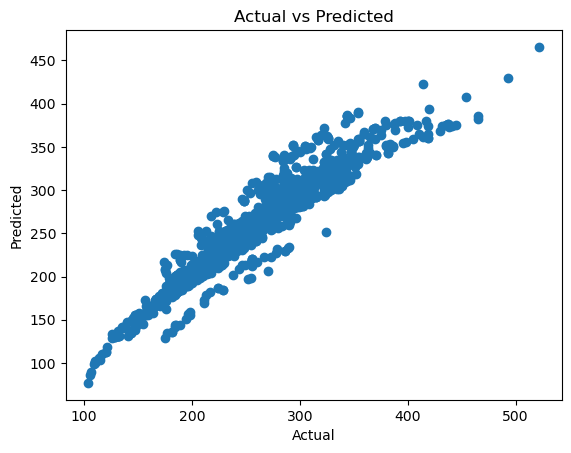

In [29]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

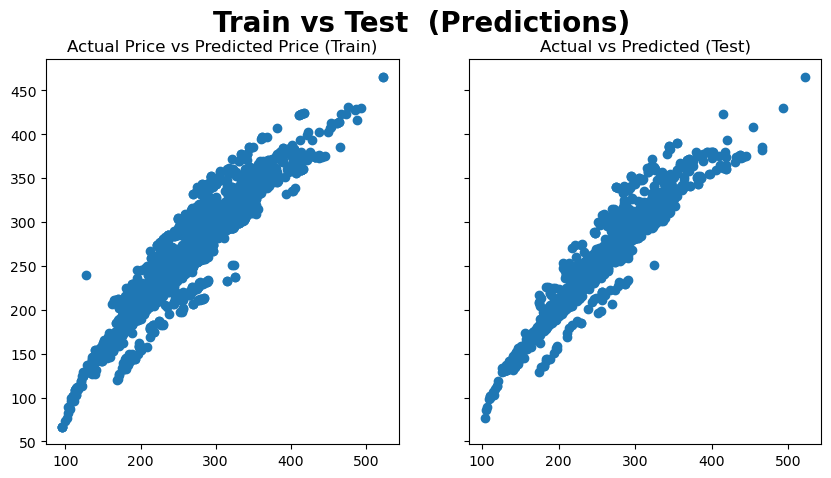

In [30]:
# Note: it is just for understanding comparision between two plots , it is upto you to plot this, it is not necessary
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.suptitle('Train vs Test  (Predictions)',fontsize=20,fontweight='bold')

# Train data 
ax[0].scatter(Y_TRAIN,train_data_prediction)
ax[0].set(title='Actual Price vs Predicted Price (Train)')

# Test data
ax[1].scatter(Y_TEST,y_pred)
ax[1].set(title='Actual vs Predicted (Test)')

plt.show()

# <u>SVM Regression</u> 

In [31]:
from sklearn.svm import SVR 

svr = SVR(kernel='linear')
svr.fit(X_TRAIN,Y_TRAIN)

SVR(kernel='linear')

## Prediction on Train Data

In [32]:
# accuracy for prediction on training data
training_data_prediction =svr.predict(X_TRAIN)
print(training_data_prediction)

[279.58450148 319.15835613 150.61361469 ... 290.65433483 279.41839813
 193.94021626]


In [33]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.812235212106675
Mean Absolute Error =  8.393098579369461


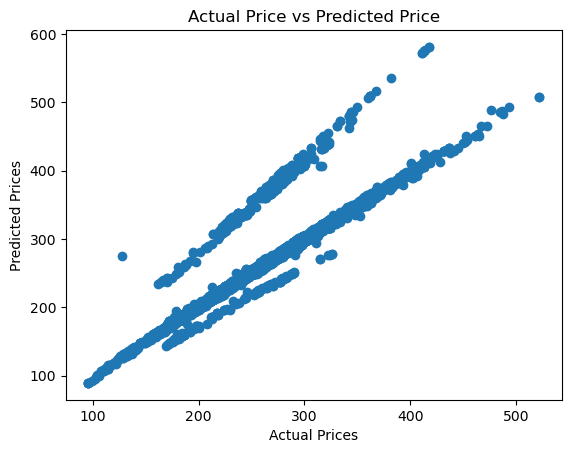

In [34]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on Test Data

In [35]:
y_pred = svr.predict(X_TEST)
y_pred

array([241.93941487, 283.5429716 , 238.16100842, ..., 233.67655131,
       185.32175089, 174.78062399])

In [36]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.819230911133283
Mean Absolute Error =  8.066009439876659


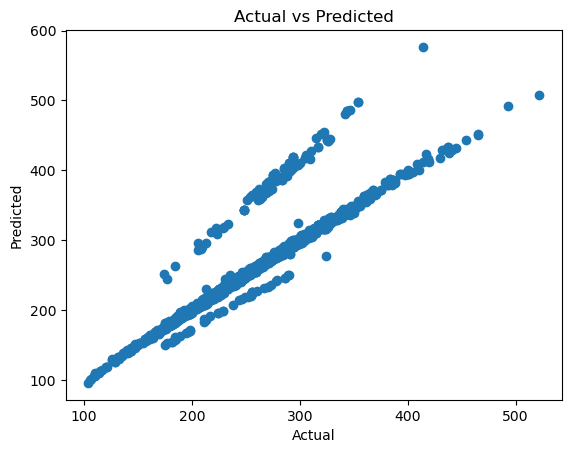

In [37]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

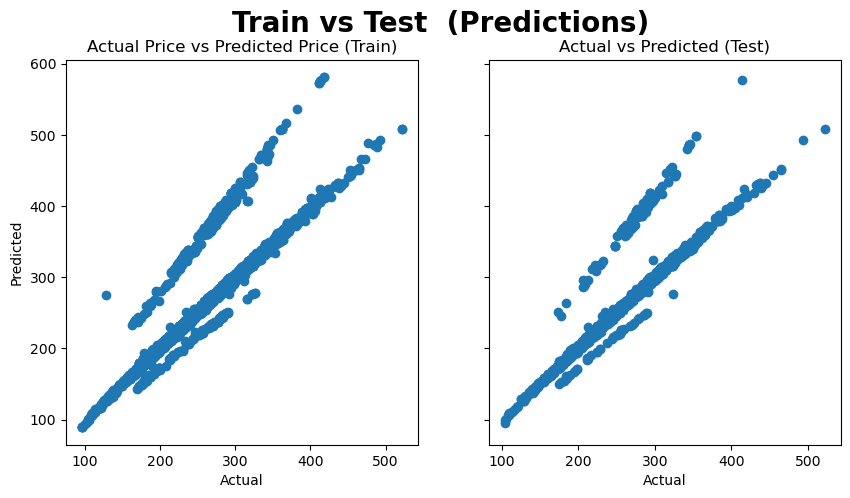

In [38]:
# Note: it is just for understanding comparision between two plots , it is upto you to plot this, it is not necessary
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.suptitle('Train vs Test  (Predictions)',fontsize=20,fontweight='bold')

# Train data 
ax[0].scatter(Y_TRAIN,training_data_prediction)
ax[0].set(title='Actual Price vs Predicted Price (Train)',
         xlabel='Actual',
         ylabel='Predicted')

# Test data
ax[1].scatter(Y_TEST,y_pred)
ax[1].set(title='Actual vs Predicted (Test)',
         xlabel='Actual')

plt.show()

# <u>Regression Decision Tree</u>

In [39]:
from sklearn.tree import DecisionTreeRegressor 

# create regressor object
regressor = DecisionTreeRegressor(random_state=25)

# fit regressor 
regressor.fit(X_TRAIN, Y_TRAIN)

DecisionTreeRegressor(random_state=25)

## Prediction on Train Data

In [40]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[279.         321.         150.66666667 ... 290.         195.
 195.        ]


In [41]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9996932983241511
Mean Absolute Error =  0.37144834820891154


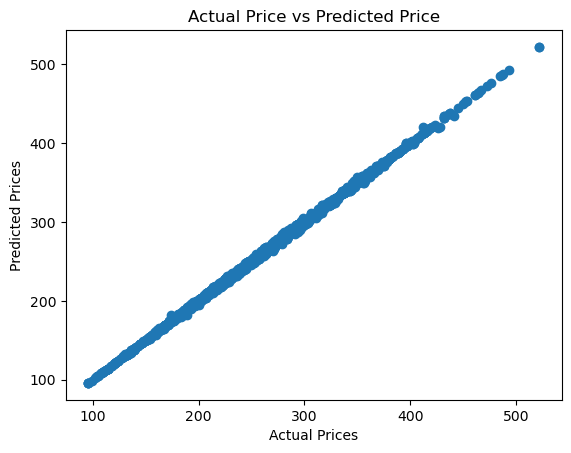

In [42]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Predicition on Test Data

In [43]:
y_pred = regressor.predict(X_TEST)
y_pred

array([244. , 285. , 238. , ..., 233. , 186. , 172.5])

In [44]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9975867297567413
Mean Absolute Error =  1.6402377085105833


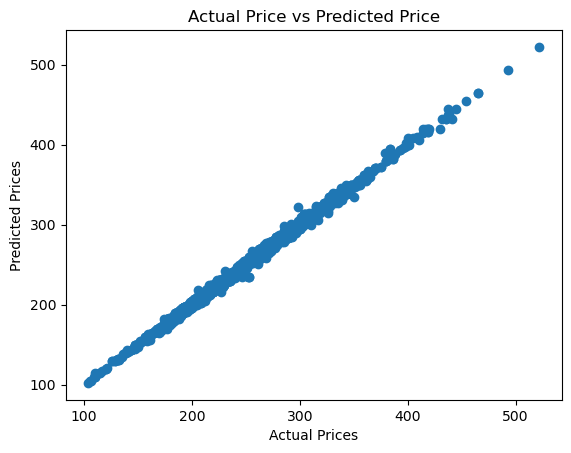

In [45]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

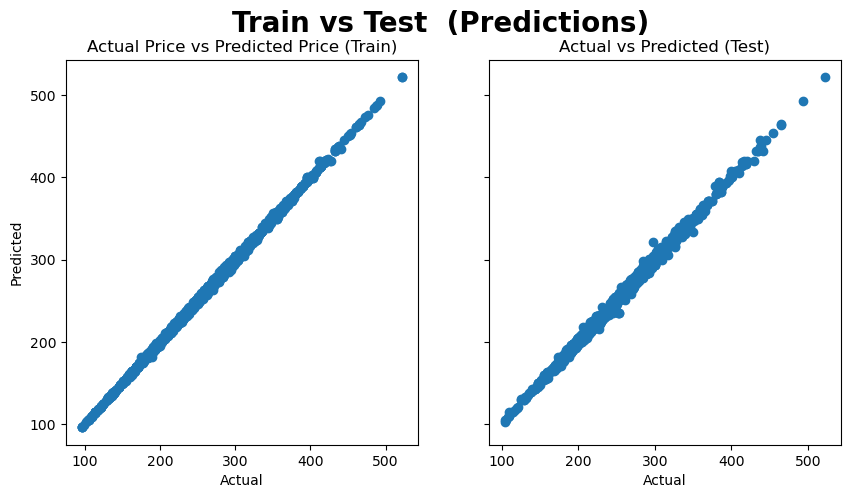

In [46]:
# Note: it is just for understanding comparision between two plots , it is upto you to plot this, it is not necessary
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.suptitle('Train vs Test  (Predictions)',fontsize=20,fontweight='bold')

# Train data 
ax[0].scatter(Y_TRAIN,training_data_prediction)
ax[0].set(title='Actual Price vs Predicted Price (Train)',
         xlabel='Actual',
         ylabel='Predicted')

# Test data
ax[1].scatter(Y_TEST,y_pred)
ax[1].set(title='Actual vs Predicted (Test)',
         xlabel='Actual')

plt.show()

# <u>Random Forest</u>

In [47]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(n_estimators=5 ,random_state=25)
regressor.fit(X_TRAIN,Y_TRAIN)

RandomForestRegressor(n_estimators=5, random_state=25)

## Prediction on Training Data

In [48]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[278.2        321.         151.65333333 ... 290.         182.4
 195.        ]


In [49]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9991172692628274
Mean Absolute Error =  0.8785836894937649


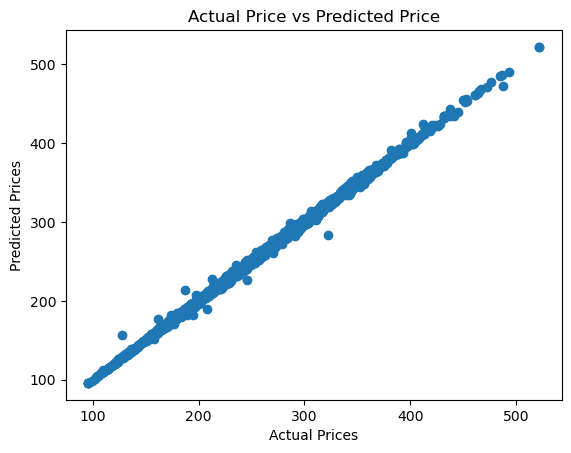

In [50]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on Test Data 

In [51]:
y_pred = regressor.predict(X_TEST)
y_pred

array([244.        , 285.        , 238.        , ..., 232.4       ,
       186.        , 174.06666667])

In [52]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9975115254335551
Mean Absolute Error =  1.818620193498374


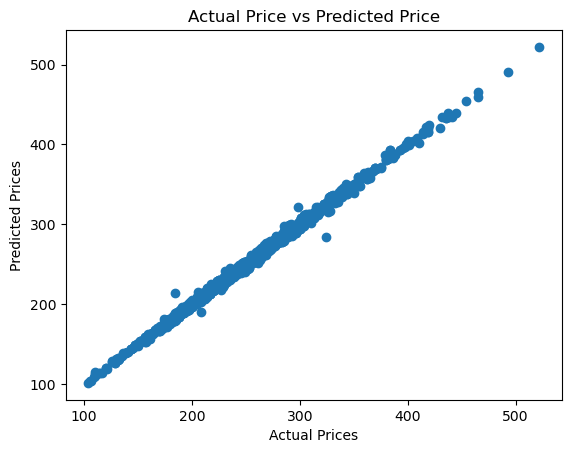

In [53]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

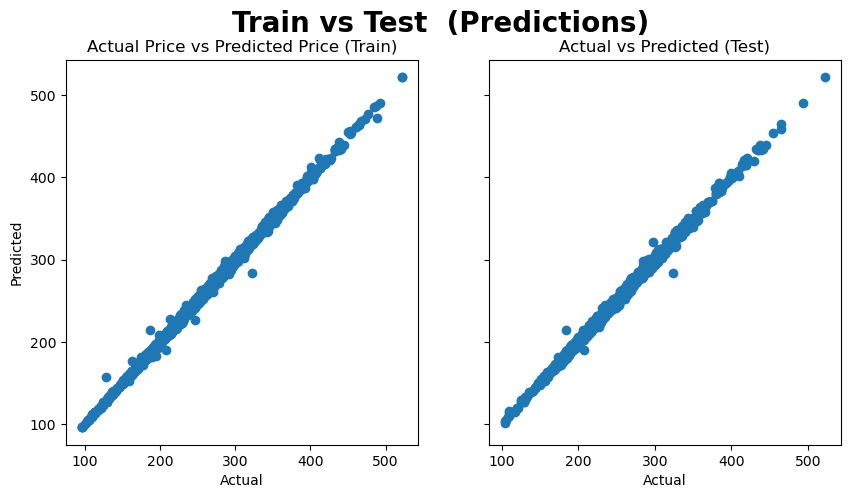

In [54]:
# Note: it is just for understanding comparision between two plots , it is upto you to plot this, it is not necessary
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.suptitle('Train vs Test  (Predictions)',fontsize=20,fontweight='bold')

# Train data 
ax[0].scatter(Y_TRAIN,training_data_prediction)
ax[0].set(title='Actual Price vs Predicted Price (Train)',
         xlabel='Actual',
         ylabel='Predicted')

# Test data
ax[1].scatter(Y_TEST,y_pred)
ax[1].set(title='Actual vs Predicted (Test)',
         xlabel='Actual')

plt.show()

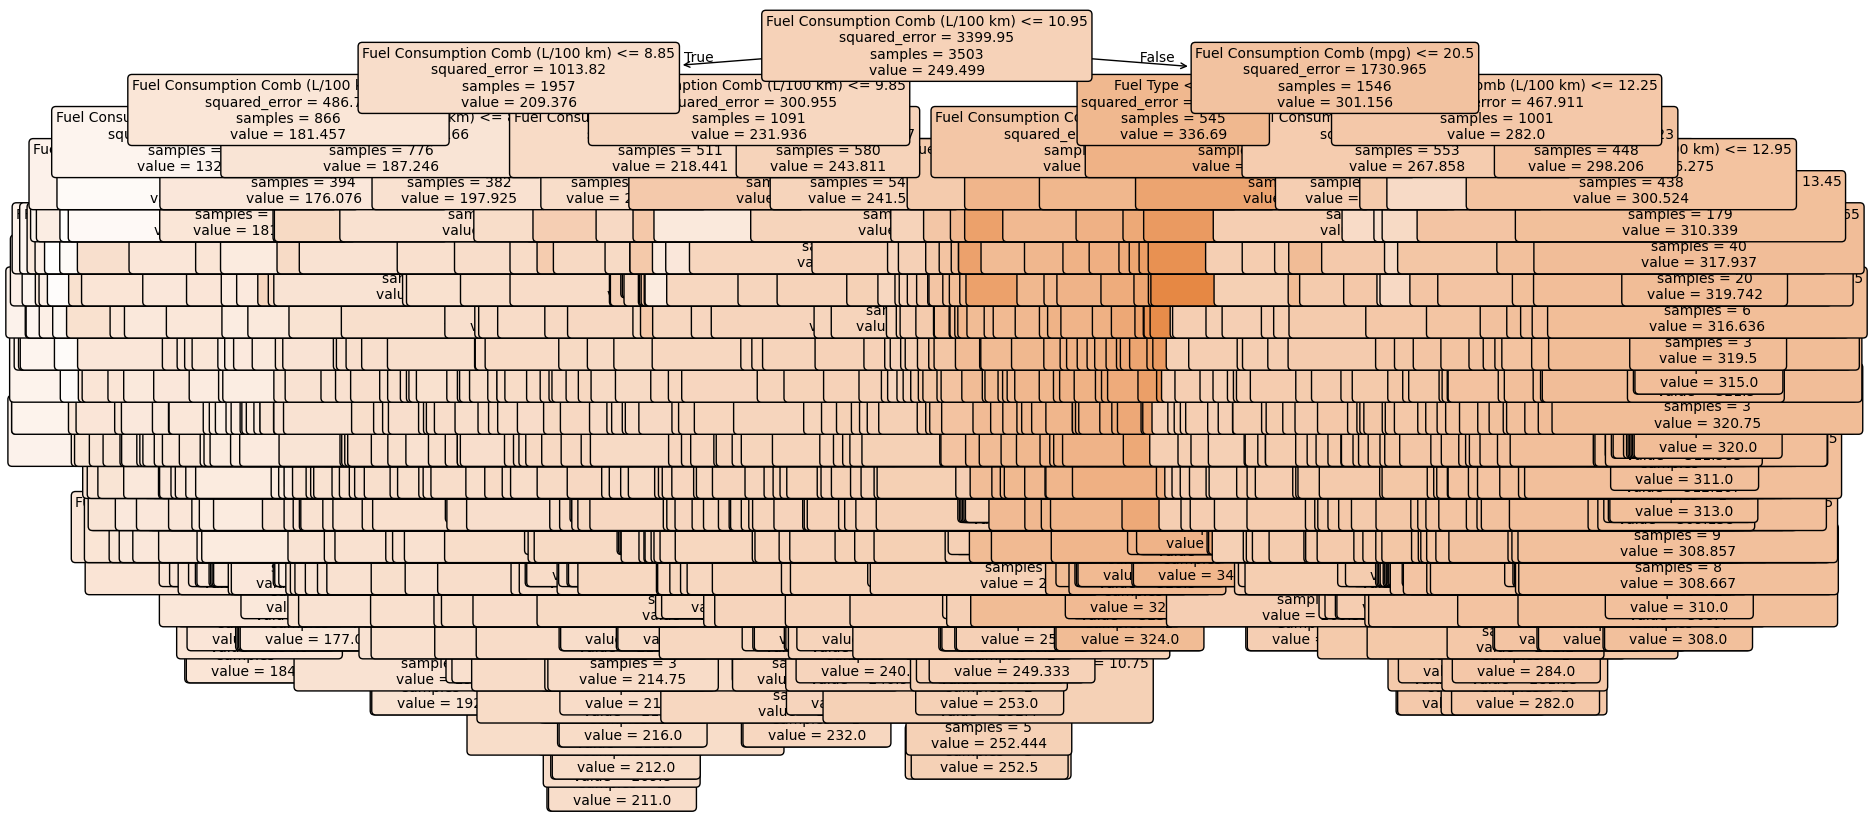

In [58]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt 

# Assuming regressor is your trained Random Forest model 
# Pick one tree from the forest, eg, the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# plot the decision tree 
plt.figure(figsize=(20,10))
plot_tree(tree_to_plot,feature_names=df.columns.tolist(),
         filled=True ,rounded=True ,fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

# <u>xgbost</u>

In [59]:
import xgboost as xgb 

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',# specifies the objective of regression
                            n_estimators= 100,
                            learning_rate= 0.1,
                            max_depth= 3, 
                            random_state= 42)
xgb_model.fit(X_TRAIN,Y_TRAIN)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Prediction on trainig data

In [61]:
# accuracy for prediction on training data
training_data_prediction = xgb_model.predict(X_TRAIN)
print(training_data_prediction)

[280.52798 322.20468 151.8604  ... 291.58514 203.18604 193.11221]


In [62]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9967948198318481
Mean Absolute Error =  2.408904066323459


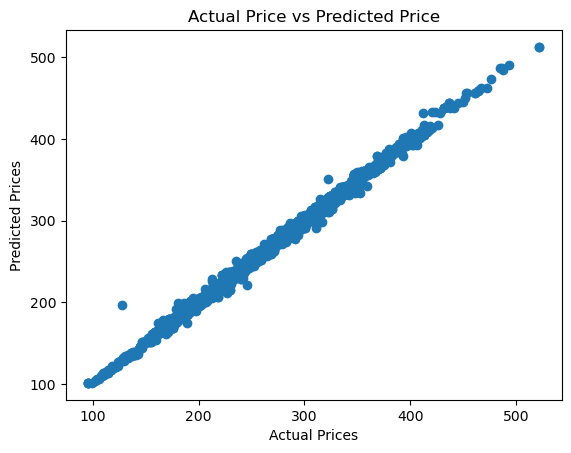

In [63]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Prediction on Test Data

In [64]:
y_pred = xgb_model.predict(X_TEST)
y_pred

array([241.14484, 281.63193, 238.59328, ..., 231.56421, 186.57228,
       176.55836], dtype=float32)

In [65]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9962073564529419
Mean Absolute Error =  2.5208160326038107


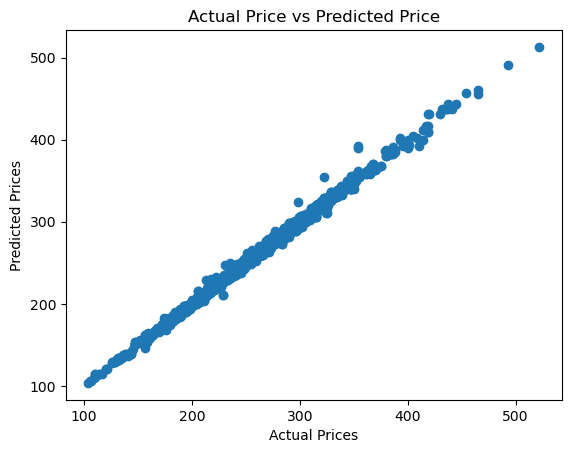

In [66]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

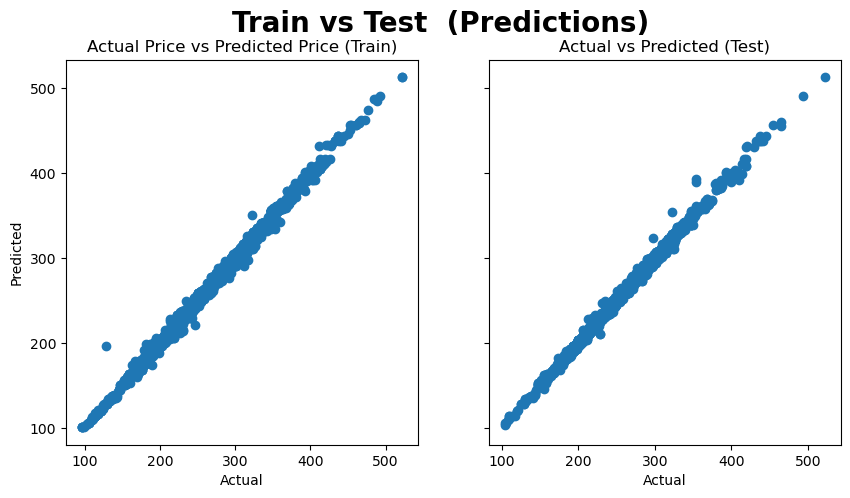

In [67]:
# Note: it is just for understanding comparision between two plots , it is upto you to plot this, it is not necessary
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharey=True)
fig.suptitle('Train vs Test  (Predictions)',fontsize=20,fontweight='bold')

# Train data 
ax[0].scatter(Y_TRAIN,training_data_prediction)
ax[0].set(title='Actual Price vs Predicted Price (Train)',
         xlabel='Actual',
         ylabel='Predicted')

# Test data
ax[1].scatter(Y_TEST,y_pred)
ax[1].set(title='Actual vs Predicted (Test)',
         xlabel='Actual')

plt.show()